In [167]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import tensorflow as tf
import pandas as pd 

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [168]:
#  Import and read the charity_data.csv.
url = 'https://raw.githubusercontent.com/JordanJaner/deep_learning_challenge/main/Resources/charity_data.csv'
application_df = pd.read_csv(url)
application_df.head(5)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [169]:
# Display the number of rows and columns
rows, columns = application_df.shape
print(f'Number of rows: {rows}, Number of columns: {columns}')

Number of rows: 34299, Number of columns: 12


In [170]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(columns = ['EIN'])

In [171]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))     

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [172]:
# Look at NAME counts for binning
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [173]:
# Choose a cutoff value and create a list of names_replace to be replaced
countsA = application_df['NAME'].value_counts()
names_replace = list(countsA[countsA<5].index)

In [174]:
# Choose a cutoff value and create a list of names_replace to be replaced
names_replace = list(countsA[countsA<5].index)

In [175]:
# Replace in dataframe
for name in names_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [176]:
# Look at APPLICATION TYPE counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [177]:
# Choose a cutoff value and create a list of application types to be replaced
counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [178]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [179]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [180]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsbinning = application_df['CLASSIFICATION'].value_counts()
countsclassification = countsbinning[countsbinning>1]

In [181]:
# Choose a cutoff value and create a list of classifications to be replaced
classifications_to_replace = list (countsbinning[countsbinning<100].index)

In [182]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [183]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [184]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values

# drop 'IS SUCCESSFUL'
X = application_df.drop('IS_SUCCESSFUL', axis=1).values

In [185]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [186]:
# Create a StandardScaler instances
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [187]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=8
hidden_nodes_layer2=16
hidden_nodes_layer3=32

nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 8)                 3624      
                                                                 
 dense_30 (Dense)            (None, 16)                144       
                                                                 
 dense_31 (Dense)            (None, 32)                544       
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4345 (16.97 KB)
Trainable params: 4345 (16.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [189]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 1ms/step - loss: 0.5195 - accuracy: 0.7454 - val_loss: 0.4441 - val_accuracy: 0.7914
Epoch 2/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4424 - accuracy: 0.7891 - val_loss: 0.4247 - val_accuracy: 0.7999
Epoch 3/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4305 - accuracy: 0.7935 - val_loss: 0.4198 - val_accuracy: 0.8056
Epoch 4/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4251 - accuracy: 0.7940 - val_loss: 0.4233 - val_accuracy: 0.8069
Epoch 5/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.7957 - val_loss: 0.4234 - val_accuracy: 0.8041
Epoch 6/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.7960 - val_loss: 0.4263 - val_accuracy: 0.8077
Epoch 7/100
684/684 [==============================] - 1s 1ms/step - loss: 0.4212 - accuracy: 0.7982 - val_loss: 0.4241 - val_accuracy: 0.8031

In [190]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4782 - accuracy: 0.7901 - 199ms/epoch - 743us/step
Loss: 0.47815197706222534, Accuracy: 0.7900874614715576


268/268 [==============================] - 0s 804us/step
AUC Score: 0.8557521494129349


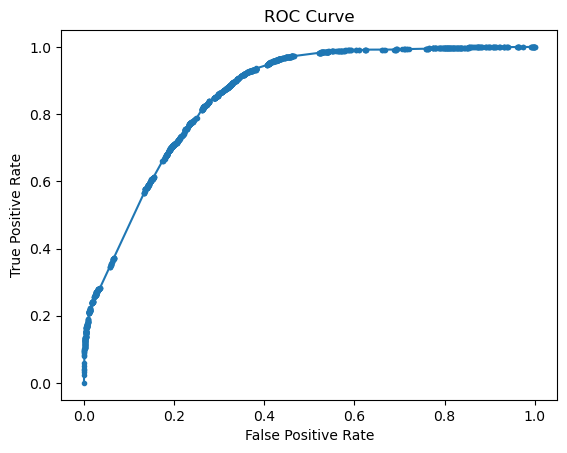

In [191]:
# Calculate AUC score and plot ROC curve
y_pred_prob = nn.predict(X_test_scaled)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC Score: {auc_score}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [192]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

C:\Users\jhyan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
